# Surveillance - Jai

In [3]:
from IPython.display import Image
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
sns.set(rc={'figure.figsize':(6,8)}) 

import warnings
warnings.simplefilter("ignore")

%matplotlib inline

from sklearn.preprocessing import LabelEncoder 

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

from sklearn import metrics

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

from sklearn.metrics import SCORERS
import re

import nltk 
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [4]:
data = pd.read_csv('surveillance.csv')

In [5]:
data = data.drop_duplicates('text')
data.head()

,user_id,status_id,created_at,screen_name,text,source,display_text_width,reply_to_status_id,reply_to_user_id,reply_to_screen_name,...,statuses_count,favourites_count,account_created_at,verified,profile_url,profile_expanded_url,account_lang,profile_banner_url,profile_background_url,profile_image_url
0,x1086388569294471172,x1406987671000563719,2021-06-21 14:49:35,hypercursor,@floridamancode @EcoTechBro It’s the successfu...,Twitter for iPhone,176,x1406984343604666368,x1266369503442554894,floridamancode,...,2216,3031,2019-01-18 22:23:13,False,NaN,NaN,NaN,https://pbs.twimg.com/profile_banners/10863885...,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/1375243020...
1,x1068338071702097920,x1406987628948324358,2021-06-21 14:49:25,waiwai__LA,"@engineers_feed Check the evacuation route, wa...",Twitter Web App,144,x1406846131603185664,x3429950987,engineers_feed,...,9099,23234,2018-11-30 02:56:59,False,NaN,NaN,NaN,https://pbs.twimg.com/profile_banners/10683380...,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/1368471393...
2,x38639718,x1406987333057003525,2021-06-21 14:48:15,lise_latulippe,The Toronto Police Service’s forensic identifi...,Twitter Web App,237,NaN,NaN,NaN,...,327958,383,2009-05-08 10:12:38,False,http://t.co/TDlDxXDMe8,http://linkis.com/blogspot.com/Nhf1O,NaN,NaN,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/9780331515...
3,x38639718,x1405496093966798855,2021-06-17 12:02:36,lise_latulippe,Trump had launched so many attacks against the...,Twitter Web App,223,NaN,NaN,NaN,...,327958,383,2009-05-08 10:12:38,False,http://t.co/TDlDxXDMe8,http://linkis.com/blogspot.com/Nhf1O,NaN,NaN,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/9780331515...
4,x38639718,x1406934080529309697,2021-06-21 11:16:39,lise_latulippe,Police released surveillance video on Sunday o...,Twitter Web App,271,NaN,NaN,NaN,...,327958,383,2009-05-08 10:12:38,False,http://t.co/TDlDxXDMe8,http://linkis.com/blogspot.com/Nhf1O,NaN,NaN,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/9780331515...


In [6]:
data.shape

(17330, 90)

In [7]:
df = data[["text", "is_quote", "is_retweet", "retweet_count", "hashtags", "followers_count"]]

In [8]:
text = df[["text"]][:10000] 
pd.set_option('display.max_colwidth', -1)
text.head()

,text
0,@floridamancode @EcoTechBro It’s the successful part that’s the rub though. Have you really thought about what would be involved? Amassing that kind of arsenal in a surveillance state? It’s pure fantasy.
1,"@engineers_feed Check the evacuation route, watch out for outside surveillance, and lie down on the floor in preparation for avoiding snipers.\r\n<U+0001F914>Instructions? .."
2,The Toronto Police Service’s forensic identification unit is currently on scene and is working to collect and preserve evidence.\r\n Taverner said officers are also reviewing video surveillance footage from the area.\r\nhttps://t.co/v36ZsRgs6t
3,"Trump had launched so many attacks against the FBI that they were obviously afraid of him, but there is a big leap from fear to actively instigating surveillance of a president’s political opponents.\r\nhttps://t.co/3zz3IHyhDI"
4,"Police released surveillance video on Sunday of a man wanted for questioning in the June 14 killing of Sean Robinson, 33, of Stamford.\r\nRobinson was on his way home from a party in East Williamsburg when he was shot, his mother told the Daily News.\r\nhttps://t.co/11OjzwqNQk"


In [9]:
wnet = WordNetLemmatizer()
port = PorterStemmer()

In [10]:
def cleanTxt(txt):
    txt = txt.lower()
    txt = re.sub(r'RT[\s]+', '', txt) #removing RT
    txt = re.sub(r'[^\w\s]','', txt) #remove everything except words and space
    txt = re.sub(r'_','', txt) #how to remove underscore as well
    if 'https' in txt: # removing hyperlinks 
        pos = txt.find('https')
        txt = txt[:pos]
    return txt

In [11]:
text['text'] = text['text'].apply(cleanTxt)
text.head()

,text
0,floridamancode ecotechbro its the successful part thats the rub though have you really thought about what would be involved amassing that kind of arsenal in a surveillance state its pure fantasy
1,engineersfeed check the evacuation route watch out for outside surveillance and lie down on the floor in preparation for avoiding snipers\r\nu0001f914instructions
2,the toronto police services forensic identification unit is currently on scene and is working to collect and preserve evidence\r\n taverner said officers are also reviewing video surveillance footage from the area\r\n
3,trump had launched so many attacks against the fbi that they were obviously afraid of him but there is a big leap from fear to actively instigating surveillance of a presidents political opponents\r\n
4,police released surveillance video on sunday of a man wanted for questioning in the june 14 killing of sean robinson 33 of stamford\r\nrobinson was on his way home from a party in east williamsburg when he was shot his mother told the daily news\r\n


In [12]:
def stopWords(txt): 
    txt_lst = txt.split(" ")
    txt_lst = [word for word in txt_lst if word not in stopwords.words('english')]
    txt_lst = [wnet.lemmatize(word) for word in txt_lst]
    txt_lst = [word for word in txt_lst if word != '']
    txt_lst = [word for word in txt_lst if word != '\r\n\r\n'] # indicates space and indexing
    txt_lst = [word for word in txt_lst if word != 'u0001f449'] # indicates back hand emoji pointing right
    txt_lst = [word for word in txt_lst if word != 'surveillance']
    txt_lst = [word for word in txt_lst if word != '\r\n']
    txt_lst = [word for word in txt_lst if word != 'u']
    return " ".join(txt_lst)

In [13]:
text['text'] = text['text'].apply(stopWords)
text.head()

,text
0,floridamancode ecotechbro successful part thats rub though really thought would involved amassing kind arsenal state pure fantasy
1,engineersfeed check evacuation route watch outside lie floor preparation avoiding snipers\r\nu0001f914instructions
2,toronto police service forensic identification unit currently scene working collect preserve evidence\r\n taverner said officer also reviewing video footage area\r\n
3,trump launched many attack fbi obviously afraid big leap fear actively instigating president political opponents\r\n
4,police released video sunday man wanted questioning june 14 killing sean robinson 33 stamford\r\nrobinson way home party east williamsburg shot mother told daily news\r\n


In [14]:
text_lst = []
for row in text['text']:
    text_lst.append(row)

text_lst[:5]

['floridamancode ecotechbro successful part thats rub though really thought would involved amassing kind arsenal state pure fantasy',
 'engineersfeed check evacuation route watch outside lie floor preparation avoiding snipers\r\nu0001f914instructions',
 'toronto police service forensic identification unit currently scene working collect preserve evidence\r\n taverner said officer also reviewing video footage area\r\n',
 'trump launched many attack fbi obviously afraid big leap fear actively instigating president political opponents\r\n',
 'police released video sunday man wanted questioning june 14 killing sean robinson 33 stamford\r\nrobinson way home party east williamsburg shot mother told daily news\r\n']

In [15]:
tv = TfidfVectorizer(
binary = True, norm = None,
use_idf = False, smooth_idf = False,
lowercase = True, stop_words = None,
min_df = 1, max_df = 1.0, max_features = None, ngram_range = (1,1))

In [16]:
text_vec = pd.DataFrame(tv.fit_transform(text_lst).toarray(), columns = tv.get_feature_names())
text_vec.head()

,000,0003,006,00lshr,00pti1,01,0106,011,01300230,01484,...,zuckerbergs,zuckerturd,zulmacucunuba,zuzusspetalss,zygmunt,zzhou61,zzst,²in,überdidi,žižek
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
text_vec.shape

(10000, 27679)

In [18]:
cs_words = []

for row in text['text']:
    for word in str(row).split(" "):
        cs_words.append(word)
        
cs_words[:5]

['floridamancode', 'ecotechbro', 'successful', 'part', 'thats']

In [19]:
len(cs_words)

160187

In [20]:
from nltk.probability import FreqDist
fdist = FreqDist()
for word in cs_words:
    fdist[word]+=1
fdist

FreqDist({'camera': 1147, 'amp': 1097, 'state': 753, 'video': 736, 'system': 687, 'security': 671, 'people': 645, 'data': 628, 'fbi': 570, 'police': 558, ...})

In [21]:
freq_data = pd.DataFrame.from_dict(fdist.most_common(20))

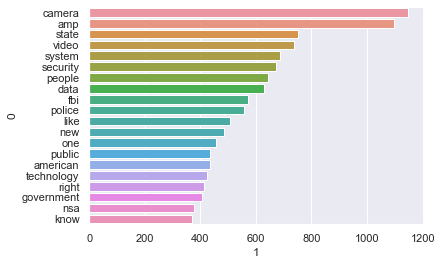

In [22]:
sns.barplot(data = freq_data, x = 1, y = 0);

In [23]:
most_common = []

for key in fdist.most_common(20):
    most_common.append(key[0])
    
most_common

['camera',
 'amp',
 'state',
 'video',
 'system',
 'security',
 'people',
 'data',
 'fbi',
 'police',
 'like',
 'new',
 'one',
 'public',
 'american',
 'technology',
 'right',
 'government',
 'nsa',
 'know']

# KMeans Clustering 

In [24]:
def evaluate_k_kmeans_inertia(k):
    print(f"running Kmeans with k={k}")
    estimator_kmeans = KMeans(random_state=42, n_clusters=k)
    estimator_kmeans.fit(text_vec)
    return estimator_kmeans.inertia_

In [25]:
%%time 
range_k = [i for i in range(1, 9)]
results_k = {}
for k in range_k:
    results_k[k] = evaluate_k_kmeans_inertia(k)

running Kmeans with k=1
running Kmeans with k=2
running Kmeans with k=3
running Kmeans with k=4
running Kmeans with k=5
running Kmeans with k=6
running Kmeans with k=7
running Kmeans with k=8
Wall time: 13min 52s


In [26]:
results_k

{1: 153972.61619999664,
 2: 151143.26188619115,
 3: 150911.0449536294,
 4: 150887.3798242371,
 5: 150573.94415906747,
 6: 150260.11894530512,
 7: 147711.95055478558,
 8: 149186.38690344608}

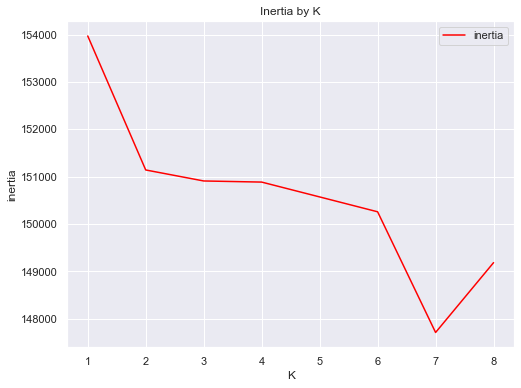

In [27]:
fig, ax = plt.subplots(figsize=(8,6))
ax = sns.lineplot(
    [c[0] for c in results_k.items()],
    [c[1] for c in results_k.items()], label="inertia", color="red")
ax.set_xlabel("K")
ax.set_ylabel("inertia")
ax.set_title("Inertia by K")
ax.legend();

In [28]:
estimator_kmeans = KMeans(random_state=42, n_clusters=5) 
estimator_kmeans.fit(text_vec)

KMeans(n_clusters=5, random_state=42)

In [29]:
text_vec["cluster_id"] = estimator_kmeans.labels_
text_vec.head()

,000,0003,006,00lshr,00pti1,01,0106,011,01300230,01484,...,zuckerturd,zulmacucunuba,zuzusspetalss,zygmunt,zzhou61,zzst,²in,überdidi,žižek,cluster_id
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2


In [30]:
text_clusters = text_vec.groupby('cluster_id').sum()
text_clusters.head()

,000,0003,006,00lshr,00pti1,01,0106,011,01300230,01484,...,zuckerbergs,zuckerturd,zulmacucunuba,zuzusspetalss,zygmunt,zzhou61,zzst,²in,überdidi,žižek
cluster_id,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,...,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [31]:
text_clusters_20 = text_clusters[['camera',
 'amp',
 'state',
 'video',
 'system',
 'security',
 'people',
 'fbi',
 'police',
 'like',
 'new',
 'one',
 'public',
 'american',
 'technology',
 'right',
 'government',
 'nsa',
 'know',
 'need']
]

text_clusters_20.head()

,camera,amp,state,video,system,security,people,fbi,police,like,new,one,public,american,technology,right,government,nsa,know,need
cluster_id,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,1.0,0.0,0.0,2.0,3.0,278.0,0.0,1.0,0.0,1.0,0.0,255.0,0.0,0.0,0.0,277.0,1.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,932.0,797.0,718.0,681.0,635.0,595.0,597.0,244.0,531.0,469.0,453.0,406.0,437.0,171.0,369.0,391.0,398.0,100.0,339.0,350.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,40.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0


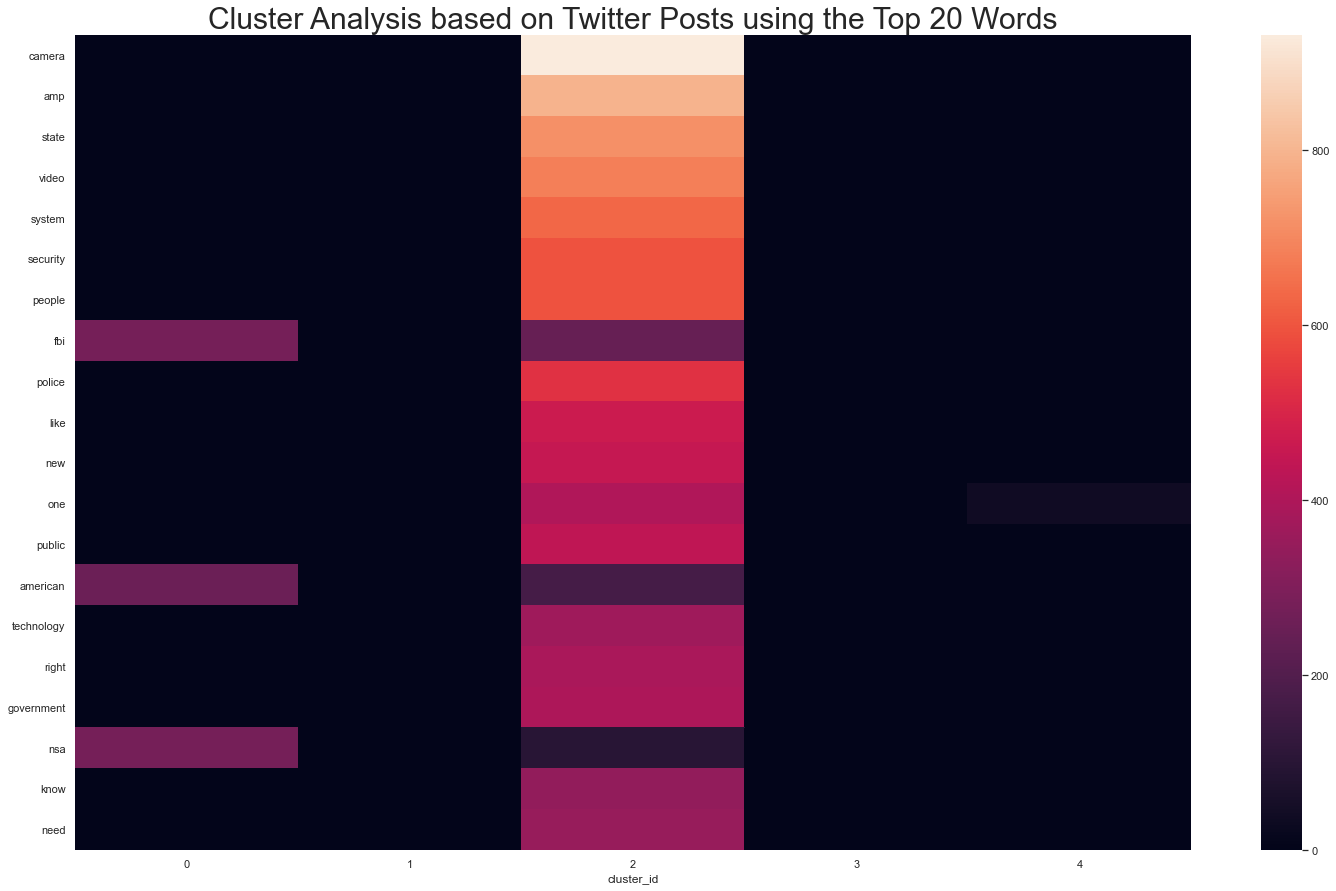

In [32]:
fig, ax = plt.subplots(figsize=(25,15))
sns.heatmap(text_clusters_20.transpose(), annot=False)
plt.title("Cluster Analysis based on Twitter Posts using the Top 20 Words", size = 30);

In [33]:
!pip install vaderSentiment

In [34]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
sid_obj = SentimentIntensityAnalyzer()
text['scores'] = text['text'].apply(lambda review: sid_obj.polarity_scores(review))

In [35]:
text.head()

,text,scores
0,floridamancode ecotechbro successful part thats rub though really thought would involved amassing kind arsenal state pure fantasy,"{'neg': 0.0, 'neu': 0.676, 'pos': 0.324, 'compound': 0.802}"
1,engineersfeed check evacuation route watch outside lie floor preparation avoiding snipers\r\nu0001f914instructions,"{'neg': 0.179, 'neu': 0.821, 'pos': 0.0, 'compound': -0.34}"
2,toronto police service forensic identification unit currently scene working collect preserve evidence\r\n taverner said officer also reviewing video footage area\r\n,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}"
3,trump launched many attack fbi obviously afraid big leap fear actively instigating president political opponents\r\n,"{'neg': 0.299, 'neu': 0.521, 'pos': 0.18, 'compound': -0.5423}"
4,police released video sunday man wanted questioning june 14 killing sean robinson 33 stamford\r\nrobinson way home party east williamsburg shot mother told daily news\r\n,"{'neg': 0.19, 'neu': 0.721, 'pos': 0.089, 'compound': -0.4767}"


In [36]:
text['compound']  = text['scores'].apply(lambda score_dict: score_dict['compound'])
text.head()

,text,scores,compound
0,floridamancode ecotechbro successful part thats rub though really thought would involved amassing kind arsenal state pure fantasy,"{'neg': 0.0, 'neu': 0.676, 'pos': 0.324, 'compound': 0.802}",0.8020
1,engineersfeed check evacuation route watch outside lie floor preparation avoiding snipers\r\nu0001f914instructions,"{'neg': 0.179, 'neu': 0.821, 'pos': 0.0, 'compound': -0.34}",-0.3400
2,toronto police service forensic identification unit currently scene working collect preserve evidence\r\n taverner said officer also reviewing video footage area\r\n,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",0.0000
3,trump launched many attack fbi obviously afraid big leap fear actively instigating president political opponents\r\n,"{'neg': 0.299, 'neu': 0.521, 'pos': 0.18, 'compound': -0.5423}",-0.5423
4,police released video sunday man wanted questioning june 14 killing sean robinson 33 stamford\r\nrobinson way home party east williamsburg shot mother told daily news\r\n,"{'neg': 0.19, 'neu': 0.721, 'pos': 0.089, 'compound': -0.4767}",-0.4767


In [37]:
text['comp_score'] = text['compound'].apply(lambda c: 'pos' if c >=0.05 else ('neg' if c <= -0.05 else 'neutral'))

text.head()

,text,scores,compound,comp_score
0,floridamancode ecotechbro successful part thats rub though really thought would involved amassing kind arsenal state pure fantasy,"{'neg': 0.0, 'neu': 0.676, 'pos': 0.324, 'compound': 0.802}",0.8020,pos
1,engineersfeed check evacuation route watch outside lie floor preparation avoiding snipers\r\nu0001f914instructions,"{'neg': 0.179, 'neu': 0.821, 'pos': 0.0, 'compound': -0.34}",-0.3400,neg
2,toronto police service forensic identification unit currently scene working collect preserve evidence\r\n taverner said officer also reviewing video footage area\r\n,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",0.0000,neutral
3,trump launched many attack fbi obviously afraid big leap fear actively instigating president political opponents\r\n,"{'neg': 0.299, 'neu': 0.521, 'pos': 0.18, 'compound': -0.5423}",-0.5423,neg
4,police released video sunday man wanted questioning june 14 killing sean robinson 33 stamford\r\nrobinson way home party east williamsburg shot mother told daily news\r\n,"{'neg': 0.19, 'neu': 0.721, 'pos': 0.089, 'compound': -0.4767}",-0.4767,neg


In [38]:
comp_score_counts = text.comp_score.value_counts()

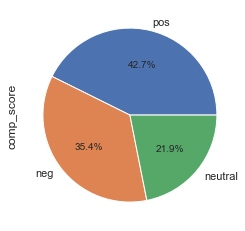

In [39]:
comp_score_counts.plot.pie(autopct="%.1f%%");

In [40]:
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
%matplotlib inline

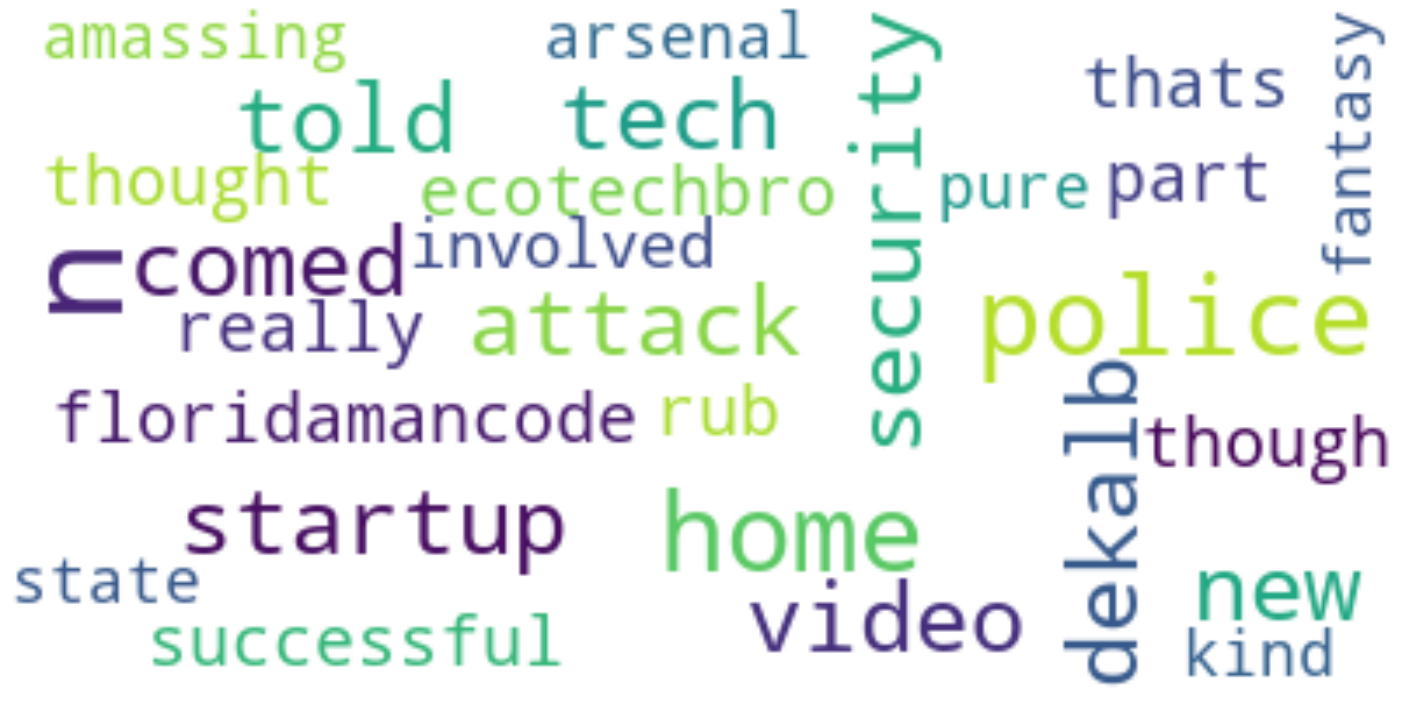

In [41]:
stopwords = set(STOPWORDS)
new_stopwords=stopwords.union(text['text'])
wc = WordCloud(
         background_color="white", max_words=2000,
         min_font_size =15, max_font_size=40, relative_scaling =
         0.5, stopwords=new_stopwords,normalize_plurals= True)
import re
textonly = re.sub("", "",str(text['text']))
wc.generate(textonly)
plt.figure(figsize=(25,25))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()
